<a href="https://colab.research.google.com/github/gummi001/NLP2/blob/main/Milestone1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__DOMAIN:__ Industrial safety. NLP based Chatbot.

__CONTEXT:__
<p>The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.</p>

__DATA DESCRIPTION:__
<p>This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.</p>

__Columns description:__
- Data: timestamp or time/date information
- Countries: which country the accident occurred (anonymised)
- Local: the city where the manufacturing plant is located (anonymised)
- Industry sector: which sector the plant belongs to
- Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
- Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
- Genre: if the person is male of female
- Employee or Third Party: if the injured person is an employee or a third party
- Critical Risk: some description of the risk involved in the accident
- Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database [ for your reference only ]

<h2 style="color: #1A5276">Milestone 1: [ Duration: 2 weeks, Score: 20 points]</h2>

<h3 style="color: #515A5A">Step 0: Import Libraries</h3>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

import nltk
from nltk import tokenize, stem, word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import missingno as mno
import holidays
from string import punctuation
import warnings
warnings.filterwarnings('ignore')
import re

import tensorflow as tf
tf.__version__

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'2.8.2'

<h3 style="color: #515A5A">Step 1: Load the dataset</h3>

<h4 style="color: #515A5A">a) Mount Google Drive</h4>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Capstone project")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h4 style="color: #515A5A">b) List the files available on the drive</h4>

In [ ]:
!ls

Accident_data_cleansed.csv
Accidents_Storyline_example.png
IHMStefanini_industrial_safety_and_health_database.csv
IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv
Milestone1.0.ipynb
output.csv
output.xlsx
project_management.gsheet
Ref
Skills.xlsx


<h4 style="color: #515A5A">c) Read the dataset files</h4>

In [ ]:
dataset1 = pd.read_csv('IHMStefanini_industrial_safety_and_health_database.csv')
dataset2 = pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

<h4 style="color: #515A5A">d) Print first 5 records of dataset1 & dataset2</h4>

In [ ]:
dataset1.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [ ]:
dataset2.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


<h4 style="color: #515A5A">e) Verify the columns of dataset1 & dataset2</h4>

In [ ]:
dataset1.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee ou Terceiro',
       'Risco Critico'],
      dtype='object')

In [ ]:
dataset2.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

<h4 style="color: #515A5A">f) Verify the shape of dataset1 & dataset2</h4>

In [ ]:
dataset1.shape, dataset2.shape

((439, 9), (425, 11))

We can conclude that dataset1 is having 439 records and 9 columns and dataset2 is having 425 records and 11 columns.

<h4 style="color: #515A5A">g) Dataset finalization</h4>
<p>Since it is an NLP problem and the <b>Description</b> field is a mandatory item, we can proceed further with <b>dataset2</b>. So we are finalizing <b>dataset2</b> for further processing by assinging it to a variable called <b>df</b></p>

In [ ]:
df = dataset2.copy()

<h4 style="color: #515A5A">h) Verify data types</h4>

In [ ]:
df.dtypes

Unnamed: 0                   int64
Data                        object
Countries                   object
Local                       object
Industry Sector             object
Accident Level              object
Potential Accident Level    object
Genre                       object
Employee or Third Party     object
Critical Risk               object
Description                 object
dtype: object

<h3 style="color: #515A5A">Step 2: Data Cleansing<h3>

<h4 style="color: #515A5A">a) Remove irrelevant columns</h4>
<p>As we already mentioned, we can remove the <b>Unnamed: 0</b> column as it contains only the index values.</p>

In [ ]:
df.drop("Unnamed: 0", axis=1, inplace=True)

<h4 style="color: #515A5A">b) Rename the columns</h4>
<p>Let's rename the columns with meaningful names.</p>

In [ ]:
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...


<h4 style="color: #515A5A">c) Verify duplicate data</h4>
<p>Let's verify the duplicate rows on the dataset.</p>

In [ ]:
df.duplicated().sum()


7

In [ ]:
duplicates = df.duplicated()

df[duplicates]

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


<h4 style="color: #515A5A">d) Drop duplicate data</h4>
<p>Let's drop the duplicate rows on the dataset.</p>

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(418, 10)

<h4 style="color: #515A5A">e) Print unique values for each fields</h4>
<p>Let's print the unique values for each fields on the dataset(excluding <b>Description</b> field).</p>

In [ ]:
for x in df.columns:
    if x != 'Description':
      print('--'*30); print(f'Unique values of "{x}" column'); print('--'*30)
      print(df[x].unique())
      print('\n')

------------------------------------------------------------
Unique values of "Date" column
------------------------------------------------------------
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00

<h4 style="color: #515A5A">f) Analyze missing values</h4>
<p>Let's analyze the missing values available on the dataset.</p>

In [ ]:
df.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee type               0
Critical Risk               0
Description                 0
dtype: int64

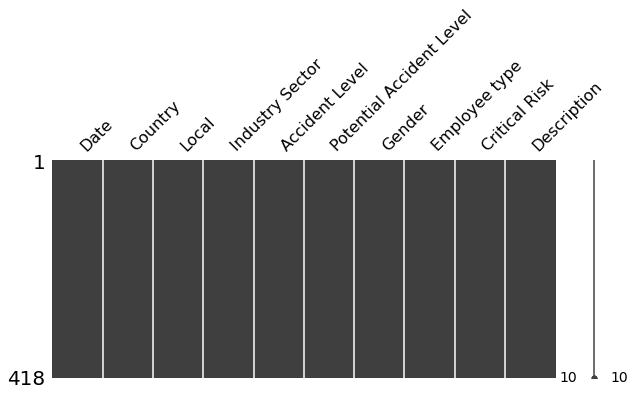

In [ ]:
mno.matrix(df, figsize = (10, 4));

<p><b>Observation:</b> Here we can see the current dataset doesn’t have any missing values.</p>

<h3 style="color: #515A5A">Step 3: Data Pre-processing for Visualization<h3>

<h4 style="color: #515A5A">Reusable functions for data preprocessing<h4>

In [ ]:
def month2seasons(x):
    if x in [9, 10, 11]:
        season = 'Spring'
    elif x in [12, 1, 2]:
        season = 'Summer'
    elif x in [3, 4, 5]:
        season = 'Autumn'
    elif x in [6, 7, 8]:
        season = 'Winter'
    return season

def preprocess_data(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df['Date'].apply(lambda x : x.year)
  df['Month'] = df['Date'].apply(lambda x : x.month)
  df['Day'] = df['Date'].apply(lambda x : x.day)
  df['Weekday'] = df['Date'].apply(lambda x : x.day_name())
  df['WeekofYear'] = df['Date'].apply(lambda x : x.weekofyear)
  df['Season'] = df['Month'].apply(month2seasons)
  df['Is_Holiday'] = [1 if str(val).split()[0] in brazil_holidays else 0 for val in df['Date']]
  return df

def print_brazil_holidays(year):
  print('--'*40); print('List of Brazil holidays in ' + str(year)); print('--'*40)
  for date in holidays.Brazil(years = year).items():
      print(date)

def get_brazil_holidays(years):
  brazil_holidays = []
  for date in holidays.Brazil(years = years).items():
    brazil_holidays.append(str(date[0]))
  return brazil_holidays

<h4 style="color: #515A5A">Print Holidays in Brazil for the years 2016 and 2017<h4>

In [ ]:
print_brazil_holidays(2016)
print_brazil_holidays(2017)

--------------------------------------------------------------------------------
List of Brazil holidays in 2016
--------------------------------------------------------------------------------
(datetime.date(2016, 1, 1), 'Ano novo')
(datetime.date(2016, 4, 21), 'Tiradentes')
(datetime.date(2016, 5, 1), 'Dia Mundial do Trabalho')
(datetime.date(2016, 9, 7), 'Independência do Brasil')
(datetime.date(2016, 10, 12), 'Nossa Senhora Aparecida')
(datetime.date(2016, 11, 2), 'Finados')
(datetime.date(2016, 11, 15), 'Proclamação da República')
(datetime.date(2016, 12, 25), 'Natal')
(datetime.date(2016, 3, 25), 'Sexta-feira Santa')
(datetime.date(2016, 3, 27), 'Páscoa')
(datetime.date(2016, 5, 26), 'Corpus Christi')
(datetime.date(2016, 2, 10), 'Quarta-feira de cinzas (Início da Quaresma)')
(datetime.date(2016, 2, 9), 'Carnaval')
--------------------------------------------------------------------------------
List of Brazil holidays in 2017
------------------------------------------------------

<h4 style="color: #515A5A">Get Holidays in Brazil for the years 2016 and 2017<h4>

In [ ]:
brazil_holidays = get_brazil_holidays([2016, 2017])

In [ ]:
brazil_holidays

['2016-01-01',
 '2016-04-21',
 '2016-05-01',
 '2016-09-07',
 '2016-10-12',
 '2016-11-02',
 '2016-11-15',
 '2016-12-25',
 '2016-03-25',
 '2016-03-27',
 '2016-05-26',
 '2016-02-10',
 '2016-02-09',
 '2017-01-01',
 '2017-04-21',
 '2017-05-01',
 '2017-09-07',
 '2017-10-12',
 '2017-11-02',
 '2017-11-15',
 '2017-12-25',
 '2017-04-14',
 '2017-04-16',
 '2017-06-15',
 '2017-03-01',
 '2017-02-28']

In [ ]:
df = preprocess_data(df)

In [ ]:
df.head(3)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0


<h4 style="color: #515A5A">Univariate Analysis</h4>

Reusable functions

In [ ]:
def univariate_analysis(col, df):
  fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "domain"}]])

  labels = df[col].value_counts().index
  values = df[col].value_counts().values
  colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.Vivid

  fig.add_trace(go.Bar(x=labels, y=values, name=col, marker=dict(color=colors), showlegend=False), row=1, col=1)
  fig.add_trace(go.Pie(labels=labels, values=values, name=col, marker=dict(colors=colors)), row=1, col=2)

  fig.update_layout(height=600, legend=dict(title=col))
  fig.show()

In [ ]:
columns = df.drop(columns=['Date', 'Description', 'WeekofYear', 'Day']) .columns

for col in columns:
    univariate_analysis(col, df)

<h4 style="color: #515A5A">Bivariate Analysis</h4>

In [ ]:
columns = df.drop(columns=['Date', 'Description', 'WeekofYear', 'Day', 'Accident Level', 'Potential Accident Level']) .columns

print(columns)


Index(['Country', 'Local', 'Industry Sector', 'Gender', 'Employee type',
       'Critical Risk', 'Year', 'Month', 'Weekday', 'Season', 'Is_Holiday'],
      dtype='object')


<h5 style="color: #515A5A">Reusable functions</h5>

In [ ]:
def bivariate_analysis(df, col, hue):
  fig = px.histogram(df, x=df[col], color=hue, width=800, height=400, title=f'{hue} vs {col} analysis')
  fig.show()

<h5 style="color: #515A5A">Gender vs other field Analysis</h5>

In [ ]:
hue = 'Gender'
columns = ['Employee type', 'Country', 'Industry Sector', 'Is_Holiday', 'Accident Level', 'Weekday', 'Year', 'Season']
for col in columns:
    bivariate_analysis(df, col, hue)

<h5 style="color: #515A5A">Accident Level vs other field Analysis</h5>

In [ ]:
hue = 'Accident Level'
columns = ['Employee type', 'Country', 'Industry Sector', 'Is_Holiday', 'Gender', 'Weekday', 'Year', 'Season', 'Local']
for col in columns:
    bivariate_analysis(df, col, hue)

<h4 style="color: #515A5A">Multivariate Analysis</h4>

In [ ]:
def pre_process_for_ml(df):
    df['Country'] = df['Country'].replace({'Country_01': 1, 'Country_02': 2, 'Country_03': 3})
    df['Local'] = df['Local'].replace({'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, \
                                        'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, \
                                        'Local_09': 9, 'Local_10': 10,  'Local_11': 11, 'Local_12': 12})
    df['Industry Sector'] = df['Industry Sector'].replace({'Mining': 1, 'Metals': 2, 'Others': 3})
    df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 2})
    df['Employee type'] = df['Employee type'].replace({'Third Party': 1, 'Employee': 2, 'Third Party (Remote)': 3})
    df['Critical Risk'] = LabelEncoder().fit_transform(df['Critical Risk'])
    df['Year'] = df['Year'].replace({'2016': 1, '2017': 2})
    df['Weekday'] = df['Weekday'].replace({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,\
                                          'Friday': 5, 'Saturday': 6, 'Sunday': 7})
    df['Season'] = df['Season'].replace({'Summer': 1, 'Autumn': 2, 'Winter': 3, 'Spring': 4})
    
    df['Accident Level'] = df['Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
    df['Potential Accident Level'] = df['Potential Accident Level'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
    return df

In [ ]:
new_df = pre_process_for_ml(df.copy())

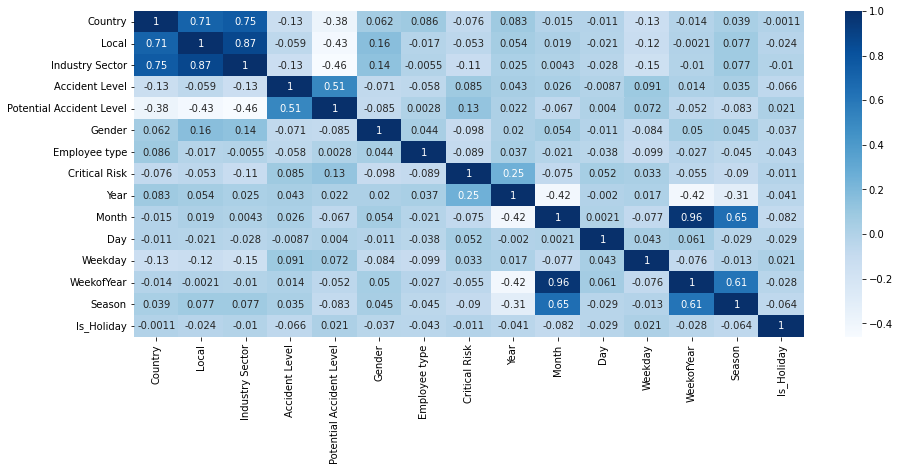

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(new_df.corr(), annot=True, cmap='Blues')
plt.show()

In [ ]:
df.describe().T.style.bar(
    subset=['mean'],
    color='Reds').background_gradient(
    subset=['std'], cmap='ocean').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Year,418.000000,2016.322967,0.468170,2016.000000,2016.000000,2016.000000,2017.000000,2017.000000
Month,418.000000,5.267943,3.186449,1.000000,3.000000,5.000000,7.000000,12.000000
Day,418.000000,15.076555,8.618416,1.000000,8.000000,15.000000,22.000000,31.000000
WeekofYear,418.000000,21.033493,13.998418,1.000000,9.000000,18.000000,30.000000,53.000000
Is_Holiday,418.000000,0.023923,0.152994,0.000000,0.000000,0.000000,0.000000,1.000000


<h4 style="color: #515A5A">Word Cloud</h4>

In [ ]:
def draw_wordcloud(df, col):
    text = " ".join(i for i in df[col])
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def preprocess_text(doc):
    # Remove all special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', doc)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove unnecessary spaces
    text = text.strip()
    
    tokens = word_tokenize(text)
    word_list = [w for w in tokens if w not in stopwords.words('english')]
    return word_list

In [ ]:
df['description_processed'] = df['Description'].apply(lambda t: ' '.join(preprocess_text(t)))

<h5 style="color: #515A5A">Word Cloud from Description field</h5>

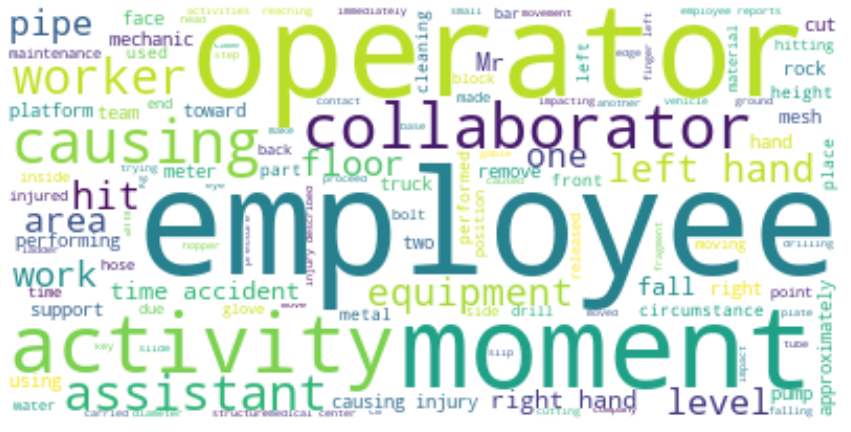

In [ ]:
draw_wordcloud(df, 'Description')

<h5 style="color: #515A5A">Word Cloud from description_processed field</h5>

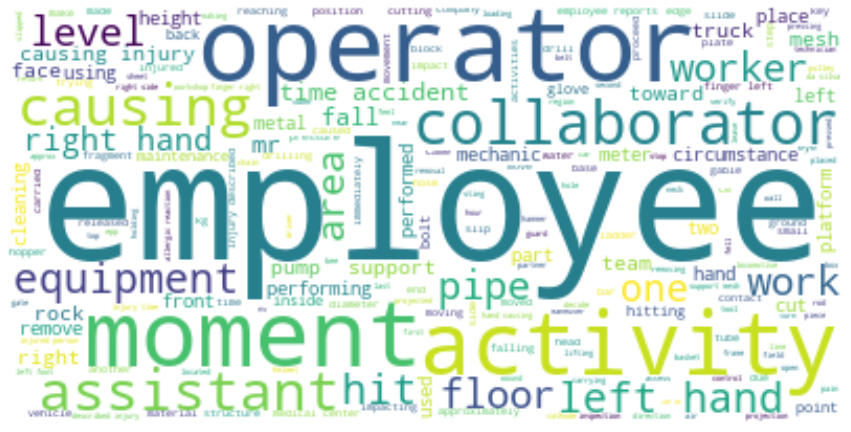

In [ ]:
draw_wordcloud(df, 'description_processed')

Here we can see the most used words on the Description field. Few of them are listed below:
1. employee
2. operator
3. moment
4. activity
5. collaborator

<h4 style="color: #515A5A">Save the cleaned dataset to CSV file</h4>

In [ ]:
from google.colab import files
df.to_csv('Accident_data_cleansed.csv', encoding = 'utf-8-sig') 
files.download('Accident_data_cleansed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<h3 style="color: #515A5A">Step 4: Data preparation to be used for AIML model learning</h3>

<h4 style="color: #515A5A">Read the dataset from Last saved CSV file</h4>

In [ ]:
df = pd.read_csv('Accident_data_cleansed.csv', encoding = 'utf-8-sig')

In [ ]:
df.head(3)

,Unnamed: 0,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Season,Is_Holiday,description_processed
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Summer,1,removing drill rod jumbo 08 maintenance superv...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,Summer,0,activation sodium sulphide pump piping uncoupl...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,Summer,0,substation milpo located level 170 collaborato...


<h4 style="color: #515A5A">Get stopwords for removal</h4>

In [ ]:
stop_words = stopwords.words('english') + list(punctuation)

<h4 style="color: #515A5A">Reusable functions for text processing</h4>

In [ ]:
def tokenize(text):
    words = word_tokenize(text)
    words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words and not w.isdigit()]

def get_vocabularies(df):
    vocabulary = set()
    for description in df['Description']:
        words = tokenize(description)
        vocabulary.update(words)

    vocabulary = list(vocabulary)
    return vocabulary

<h4 style="color: #515A5A">Get X and y values from the dataset</h4>

In [ ]:
X = df[['Description']]
y = df[['Accident Level']]

<h4 style="color: #515A5A">Get volcabulary set from X(text data)</h4>

In [ ]:
vocabulary = get_vocabularies(X)

<h4 style="color: #515A5A">Prepare Train set and Test set from dataset</h4>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['Description'].values, y['Accident Level'].values, test_size=0.2, random_state=7)

<h4 style="color: #515A5A">Prepare Vectorizer</h4>

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words, tokenizer=tokenize, vocabulary=vocabulary)
vectorizer.fit(X_train)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f695bd98050>,
                vocabulary=['pointed', 'blower', 'rear', 'test', 'tq', 'stroke',
                            'copper', 'size', 'progressive', 'borehole', 'line',
                            'part', 'breaking', 'additive', 'c7-26',
                            'disassembly', 'detaching', 'excited', 'road',
                            'shallow', 'survey', 'knuckles', 'boss', 'cable',
                            'forest', 'grab', 'manoel', 'pressed', 'eduardo',
                            'bottle', ...])

<h4 style="color: #515A5A">Transform X_train & X_test using vectorizer</h4>

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

<h4 style="color: #515A5A">Prepare reusable function for model building and evaluation</h4>

In [ ]:
def get_multi_model_results(X_train, y_train, X_test, y_test):
    models = {
        'Multinomial NB': MultinomialNB(),
        'Logistic Regression': LogisticRegression(),
        'Gaussian NB': GaussianNB(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(),
        'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=50, min_samples_leaf=7),
        'Random Forest': RandomForestClassifier(n_estimators=50, max_samples=7),
        'Bagging': BaggingClassifier(n_estimators=100, max_samples=10),
        'Ada Boost': AdaBoostClassifier(n_estimators=100),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
    }
    
    names = []
    prediction = []
    train_scores = []
    test_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
        
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        ps, rs, fs, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        names.append(name)
        prediction.append(y_pred)
        train_scores.append(round(train_score * 100, 2))
        test_scores.append(round(test_score * 100, 2))
        precision_scores.append(round(ps * 100, 2))
        recall_scores.append(round(rs * 100, 2))
        f1_scores.append(round(fs * 100, 2))
    
    results = pd.DataFrame({
        'Model': names, 
        'Train Accuracy': train_scores, 
        'Test Accuracy': test_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1': f1_scores
    })
    
    return results

<h4 style="color: #515A5A">Get the model evaluation results</h4>

In [ ]:
model_results = get_multi_model_results(X_train.todense(), y_train, X_test.todense(), y_test)
model_results

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1
0,Multinomial NB,72.75,78.57,61.73,78.57,69.14
1,Logistic Regression,72.75,78.57,61.73,78.57,69.14
2,Gaussian NB,99.40,77.38,61.53,77.38,68.55
3,KNN,73.95,76.19,62.86,76.19,68.88
4,SVM,77.54,78.57,61.73,78.57,69.14
5,Decision Tree,74.85,71.43,60.44,71.43,65.48
6,Random Forest,72.75,78.57,61.73,78.57,69.14
7,Bagging,72.75,78.57,61.73,78.57,69.14
8,Ada Boost,73.95,77.38,62.28,77.38,69.02
9,Gradient Boosting,99.10,73.81,60.89,73.81,66.73


<h4 style="color: #515A5A">Prepare reusable function for visualizing model scores</h4>

In [ ]:
def visualize_model_score(result_df, col):
  result_df = result_df.sort_values(by=col, ascending=False)
  fig = px.bar(result_df, x='Model', y=col, color=col, \
               width=1200, height=500, text=[f'{str(i)} %' for i in result_df[col]],\
               color_continuous_scale='blugrn')
  fig.update_layout(title=f'{col} score of Models', title_x=0.5)
  fig.update_yaxes(range=[0, 100])
  fig.show()

In [ ]:
visualize_model_score(model_results, 'Train Accuracy')

In [ ]:
visualize_model_score(model_results, 'Test Accuracy')

In [ ]:
visualize_model_score(model_results, 'Precision')

In [ ]:
visualize_model_score(model_results, 'Recall')

In [ ]:
visualize_model_score(model_results, 'F1')

<h3 style="color: #515A5A">Conclusion</h3>

- We have an overfitting problem with many of the models. Most of them perform well in Training but not so well in tests.
- Except Random Forest all of them are overfitting.
- We can do hyper-parameter tuning for these models to improve accuracy.


<hr>

In [ ]:
%%shell
jupyter nbconvert --to html //content/Milestone1_0.ipynb

[NbConvertApp] Converting notebook //content/Milestone1_0.ipynb to html
[NbConvertApp] Writing 1896487 bytes to //content/Milestone1_0.html
